In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from analysis_functions import *

# Effect of Replay Buffer Size on Loss for 2-qubit UQC 

We already know that the target network frequency update heavily impacts the behaviour of the loss function in Q-Learning. Now, we want to know what is the impact of the replay behaviour. Too do that, we varied the replay buffer size for the 2-qubit UQC and maintained all the other hyperparameters the same.

In [15]:
uqc_10k_path = "../../results/replaybuffer_loss/uqc_10k"
uqc_25k_path = "../../results/replaybuffer_loss/uqc_25k"
uqc_50k_path = "../../results/replaybuffer_loss/uqc_50k"
uqc_75k_path = "../../results/replaybuffer_loss/uqc_75k"
uqc_100k_path = "../../results/replaybuffer_loss/uqc_100k"

uqc_10k = Analysis(uqc_10k_path)
uqc_25k = Analysis(uqc_25k_path)
uqc_50k = Analysis(uqc_50k_path)
uqc_75k = Analysis(uqc_75k_path)
uqc_100k = Analysis(uqc_100k_path)

### Performance

In [16]:
uqc_10k_return = uqc_10k.get_rewards()
uqc_25k_return = uqc_25k.get_rewards()
uqc_50k_return = uqc_50k.get_rewards()
uqc_75k_return = uqc_75k.get_rewards()
uqc_100k_return = uqc_100k.get_rewards()

uqc_10k_mean = np.mean(uqc_10k_return, axis=0)
uqc_25k_mean = np.mean(uqc_25k_return, axis=0)
uqc_50k_mean = np.mean(uqc_50k_return, axis=0)
uqc_75k_mean = np.mean(uqc_75k_return, axis=0)
uqc_100k_mean = np.mean(uqc_100k_return, axis=0)

uqc_10k_std = np.std(uqc_10k_return, axis=0)
uqc_25k_std = np.std(uqc_25k_return, axis=0)
uqc_50k_std = np.std(uqc_50k_return, axis=0)
uqc_75k_std = np.std(uqc_75k_return, axis=0)
uqc_100k_std = np.std(uqc_100k_return, axis=0)

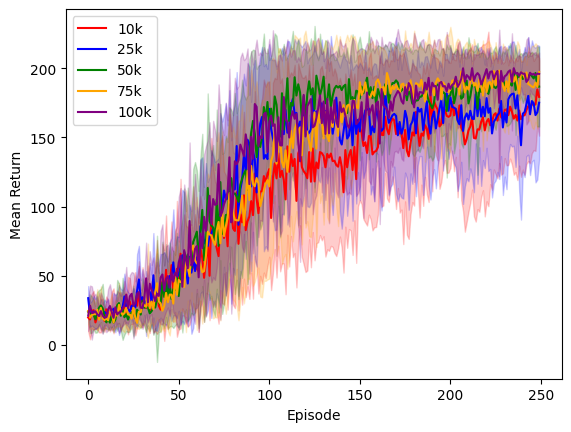

In [17]:
plt.plot(uqc_10k_mean, color='red', label='10k')
plt.fill_between(np.arange(len(uqc_10k_mean)), uqc_10k_mean - uqc_10k_std, uqc_10k_mean + uqc_10k_std, alpha=0.2, color='red')
plt.plot(uqc_25k_mean, color='blue', label='25k')
plt.fill_between(np.arange(len(uqc_25k_mean)), uqc_25k_mean - uqc_25k_std, uqc_25k_mean + uqc_25k_std, alpha=0.2, color='blue')
plt.plot(uqc_50k_mean, color='green', label='50k')
plt.fill_between(np.arange(len(uqc_50k_mean)), uqc_50k_mean - uqc_50k_std, uqc_50k_mean + uqc_50k_std, alpha=0.2, color='green')
plt.plot(uqc_75k_mean, color='orange', label='75k')
plt.fill_between(np.arange(len(uqc_75k_mean)), uqc_75k_mean - uqc_75k_std, uqc_75k_mean + uqc_75k_std, alpha=0.2, color='orange')
plt.plot(uqc_100k_mean, color='purple', label='100k')
plt.fill_between(np.arange(len(uqc_100k_mean)), uqc_100k_mean - uqc_100k_std, uqc_100k_mean + uqc_100k_std, alpha=0.2, color='purple')
plt.legend()
plt.xlabel("Episode")
plt.ylabel("Mean Return")
plt.show()

Curiously, it seems like the bigger replay buffer size leads to better performance. However, we see a clear dropoff in performance around episode 125. This probably happens because the replay buffer gets full and starts to overwrite the oldest experiences. This probably explains the dropoff in performance as by this time the policy is already becoming more stable and that increases the correlations between the different experiences, which is not good for the agent.

### Loss Function

In [18]:
uqc_10k_loss = uqc_10k.get_loss()
uqc_25k_loss = uqc_25k.get_loss()
uqc_50k_loss = uqc_50k.get_loss()
uqc_75k_loss = uqc_75k.get_loss()
uqc_100k_loss = uqc_100k.get_loss()

def limit_loss_size(loss):
    min_length = np.min([len(l) for l in loss])
    return [l[:min_length] for l in loss]

uqc_10k_loss = limit_loss_size(uqc_10k_loss)
uqc_25k_loss = limit_loss_size(uqc_25k_loss)
uqc_50k_loss = limit_loss_size(uqc_50k_loss)
uqc_75k_loss = limit_loss_size(uqc_75k_loss)
uqc_100k_loss = limit_loss_size(uqc_100k_loss)

uqc_10k_loss_mean = np.mean(uqc_10k_loss, axis=0)
uqc_25k_loss_mean = np.mean(uqc_25k_loss, axis=0)
uqc_50k_loss_mean = np.mean(uqc_50k_loss, axis=0)
uqc_75k_loss_mean = np.mean(uqc_75k_loss, axis=0)
uqc_100k_loss_mean = np.mean(uqc_100k_loss, axis=0)

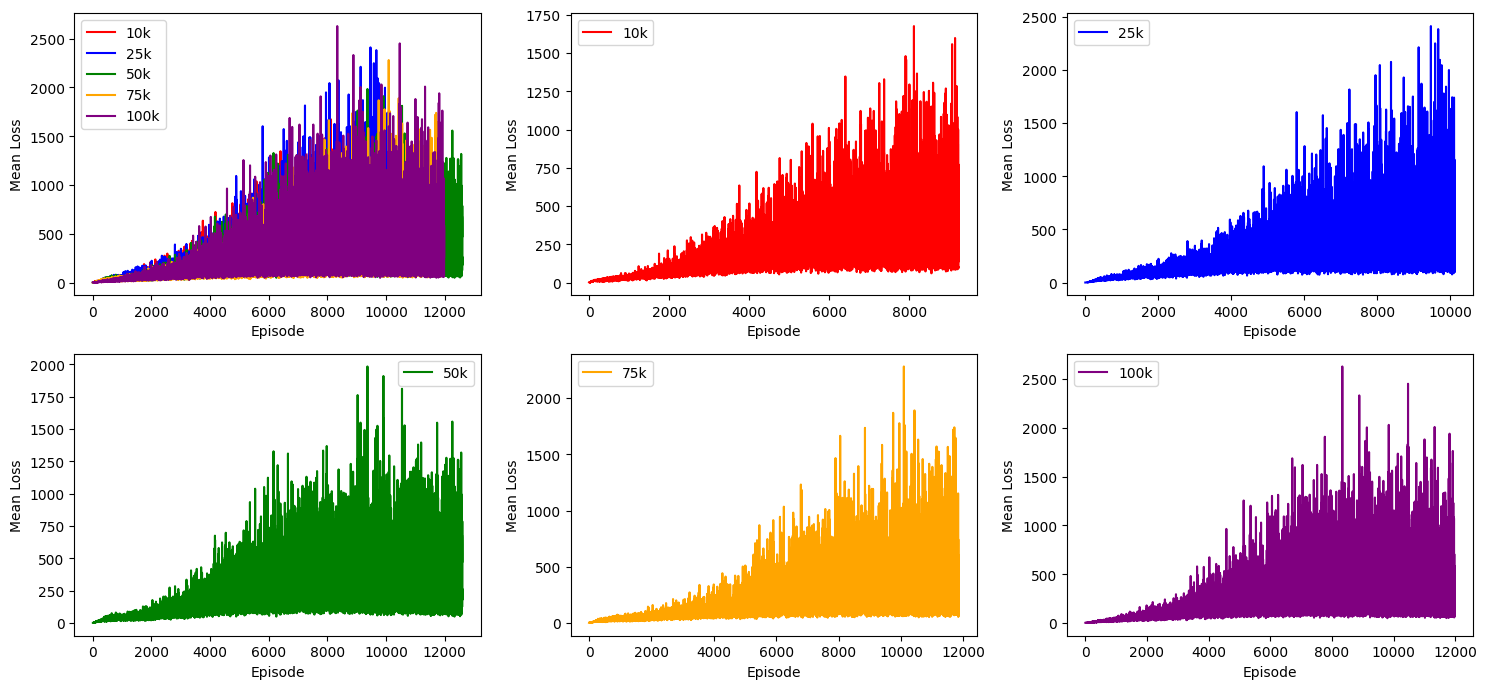

In [19]:
fig, axs = plt.subplots(2, 3, figsize=(15, 7), tight_layout=True)

axs[0,0].plot(uqc_10k_loss_mean, color='red', label='10k')
axs[0,0].plot(uqc_25k_loss_mean, color='blue', label='25k')
axs[0,0].plot(uqc_50k_loss_mean, color='green', label='50k')
axs[0,0].plot(uqc_75k_loss_mean, color='orange', label='75k')
axs[0,0].plot(uqc_100k_loss_mean, color='purple', label='100k')
axs[0,0].legend()
axs[0,0].set_xlabel("Episode")
axs[0,0].set_ylabel("Mean Loss")

axs[0,1].plot(uqc_10k_loss_mean, color='red', label='10k')
axs[0,1].legend()
axs[0,1].set_xlabel("Episode")
axs[0,1].set_ylabel("Mean Loss")

axs[0,2].plot(uqc_25k_loss_mean, color='blue', label='25k')
axs[0,2].legend()
axs[0,2].set_xlabel("Episode")
axs[0,2].set_ylabel("Mean Loss")

axs[1,0].plot(uqc_50k_loss_mean, color='green', label='50k')
axs[1,0].legend()
axs[1,0].set_xlabel("Episode")
axs[1,0].set_ylabel("Mean Loss")

axs[1,1].plot(uqc_75k_loss_mean, color='orange', label='75k')
axs[1,1].legend()
axs[1,1].set_xlabel("Episode")
axs[1,1].set_ylabel("Mean Loss")

axs[1,2].plot(uqc_100k_loss_mean, color='purple', label='100k')
axs[1,2].legend()
axs[1,2].set_xlabel("Episode")
axs[1,2].set_ylabel("Mean Loss")

plt.show()

When it comes to the loss function, it seems like the loss function isn't that affected by the replay buffer size, as the loss function seems to be pretty stable for all the different replay buffer sizes. One interesting thing that we can see is that the loss seems to grow until the repaly buffer gets filled with experiences.

### Gradients

In [20]:
uqc_10k_mean_gradients, uqc_10k_mean_variance = uqc_10k.calculate_mean_variance_gradients()
uqc_25k_mean_gradients, uqc_25k_mean_variance = uqc_25k.calculate_mean_variance_gradients()
uqc_50k_mean_gradients, uqc_50k_mean_variance = uqc_50k.calculate_mean_variance_gradients()
uqc_75k_mean_gradients, uqc_75k_mean_variance = uqc_75k.calculate_mean_variance_gradients()
uqc_100k_mean_gradients, uqc_100k_mean_variance = uqc_100k.calculate_mean_variance_gradients()

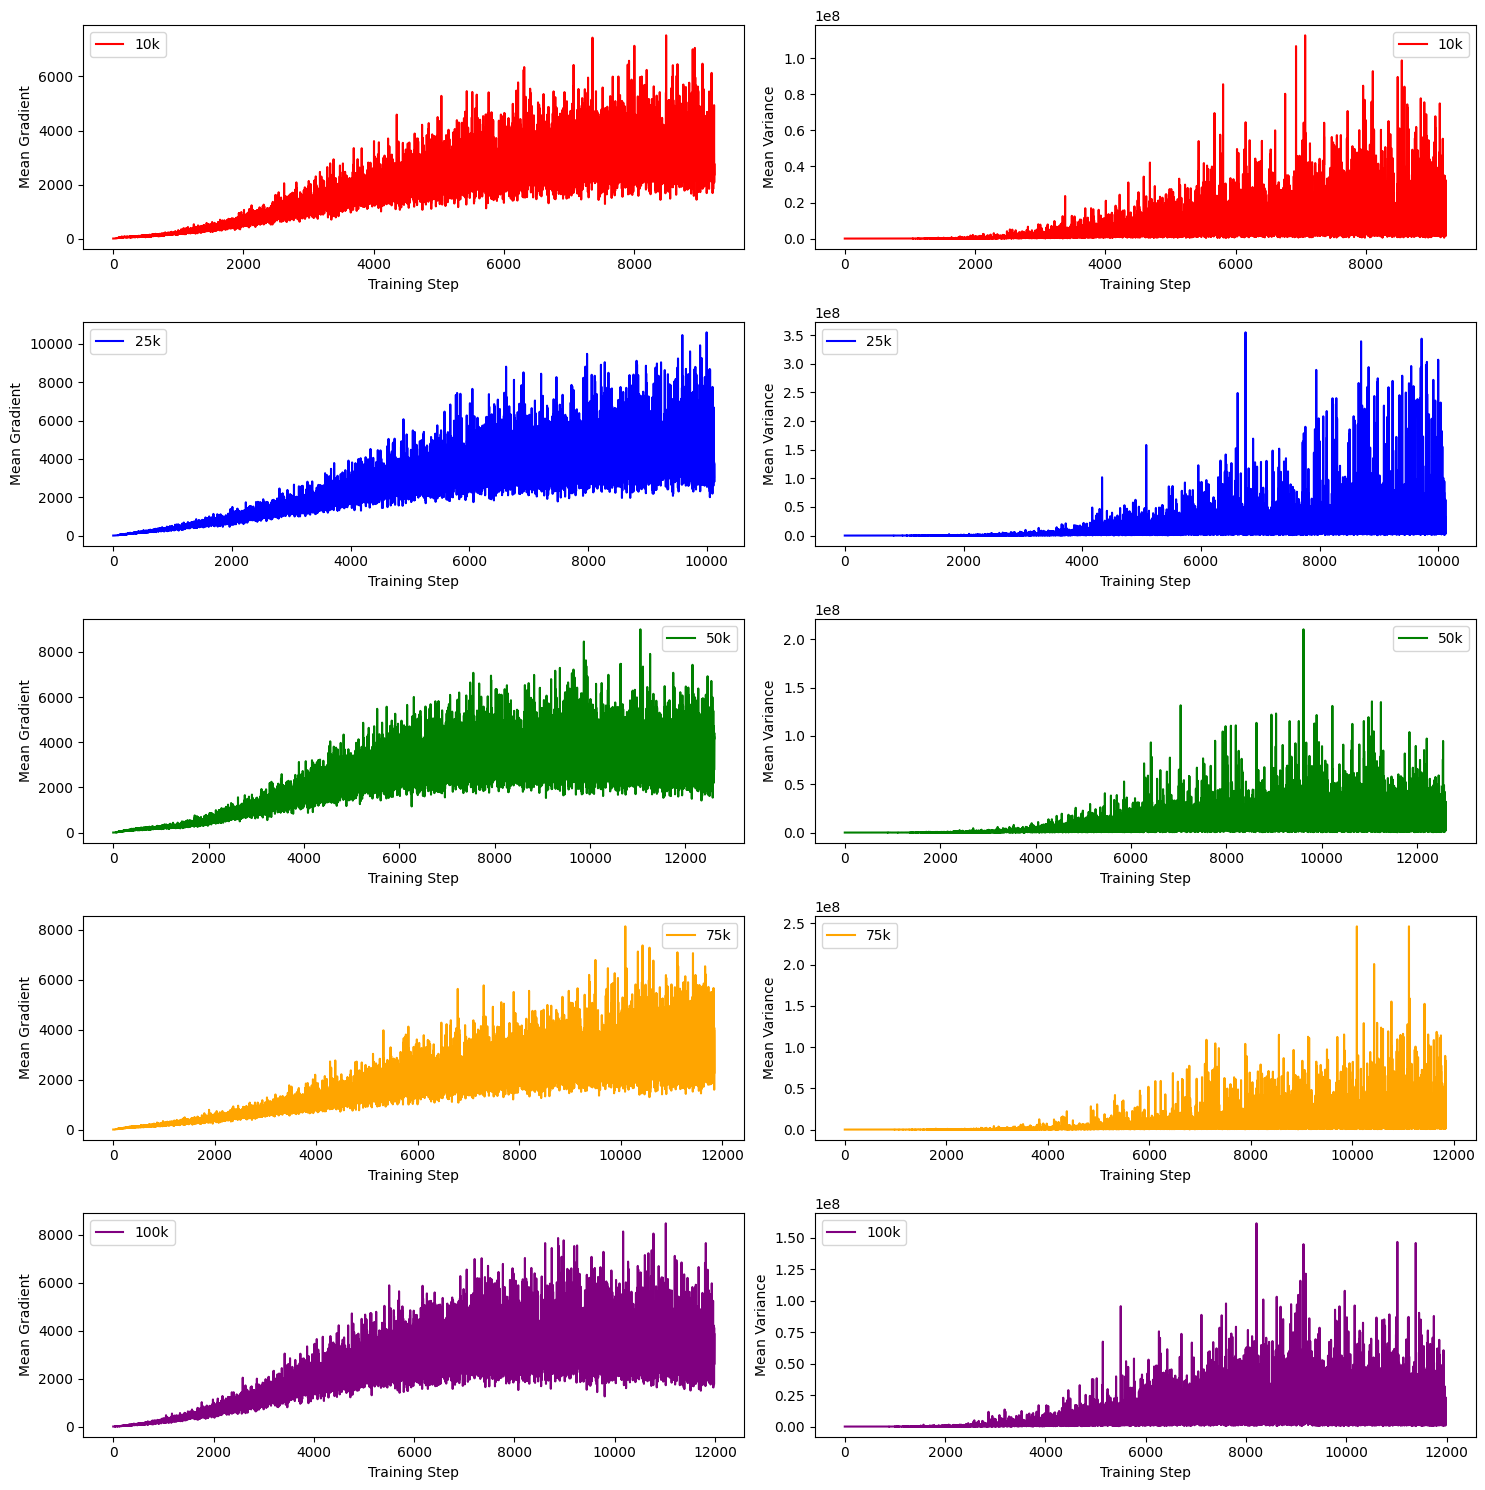

In [21]:
fig, axs = plt.subplots(5, 2, figsize=(15, 15), tight_layout=True)

axs[0,0].plot(uqc_10k_mean_gradients, color='red', label='10k')
axs[0,0].legend()
axs[0,0].set_xlabel("Training Step")
axs[0,0].set_ylabel("Mean Gradient")

axs[0,1].plot(uqc_10k_mean_variance, color='red', label='10k')
axs[0,1].legend()
axs[0,1].set_xlabel("Training Step")
axs[0,1].set_ylabel("Mean Variance")

axs[1,0].plot(uqc_25k_mean_gradients, color='blue', label='25k')
axs[1,0].legend()
axs[1,0].set_xlabel("Training Step")
axs[1,0].set_ylabel("Mean Gradient")

axs[1,1].plot(uqc_25k_mean_variance, color='blue', label='25k')
axs[1,1].legend()
axs[1,1].set_xlabel("Training Step")
axs[1,1].set_ylabel("Mean Variance")

axs[2,0].plot(uqc_50k_mean_gradients, color='green', label='50k')
axs[2,0].legend()
axs[2,0].set_xlabel("Training Step")
axs[2,0].set_ylabel("Mean Gradient")

axs[2,1].plot(uqc_50k_mean_variance, color='green', label='50k')
axs[2,1].legend()
axs[2,1].set_xlabel("Training Step")
axs[2,1].set_ylabel("Mean Variance")

axs[3,0].plot(uqc_75k_mean_gradients, color='orange', label='75k')
axs[3,0].legend()
axs[3,0].set_xlabel("Training Step")
axs[3,0].set_ylabel("Mean Gradient")

axs[3,1].plot(uqc_75k_mean_variance, color='orange', label='75k')
axs[3,1].legend()
axs[3,1].set_xlabel("Training Step")
axs[3,1].set_ylabel("Mean Variance")

axs[4,0].plot(uqc_100k_mean_gradients, color='purple', label='100k')
axs[4,0].legend()
axs[4,0].set_xlabel("Training Step")
axs[4,0].set_ylabel("Mean Gradient")

axs[4,1].plot(uqc_100k_mean_variance, color='purple', label='100k')
axs[4,1].legend()
axs[4,1].set_xlabel("Training Step")
axs[4,1].set_ylabel("Mean Variance")

plt.show()